# STA 141B: Homework 2
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:Zihao

Last Name: Chen

Student ID: 915490404

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [1]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

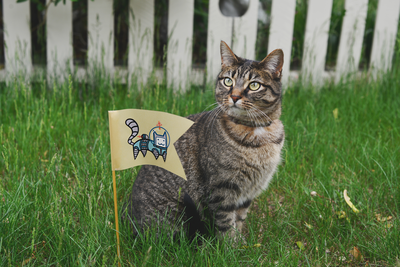

In [2]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [3]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [4]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [1]:
#this cell is to get prepared for the following exercise.
from PIL import Image
cat_img = Image.open("cat.png")
import numpy as np
#copy the img in case i did something wrong
cat1=np.array(cat_img)

def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

In [2]:
#The dimensions of cat array.
cat1.shape

(267, 400, 3)

It can be considered in this way. There are 267 rows and 400 collumns, each entry is a 3 dimension vector. To be more specific, There are $267\times 400$ pixels and each pixels have a RGB value 

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

[34 38 39]
[34 39 38]


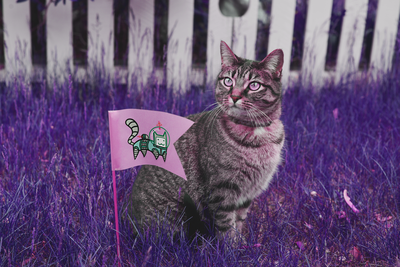

In [3]:
#Use .copy() to copy the cat1 array to a new variable.
cat=cat1.copy()

#swap the green and blue color channels in the copy.

print(cat[1,1,:])#the original pixel sample

cat[:,:,(1,2)]=cat[:,:,(2,1)]#swap the channels

print(cat[1,1,:]) #the sample changed 

as_image(cat)

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

If we do not use .copy(), cat=cat1 means copy the label. Any changes in cat will also effect cat1 because cat and cat1 point to the same object in the RAM.

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

[ 34  39 217]


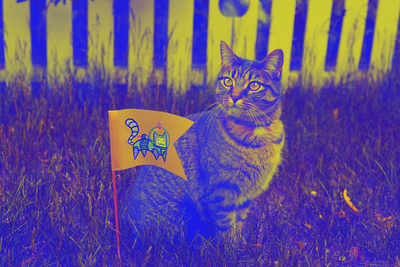

In [4]:
# I may misunderstand the question. Accroding to my understanding, if the blue color channel is 5, i need to flip it as 255-5=250.

cat[:,:,2]=255*np.ones((267,400))-cat[:,:,2]

print(cat[1,1,:])#the sample pixel again
as_image(cat)

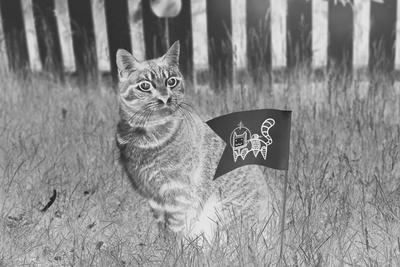

In [5]:
#When talking to some classmate, I find that i misunderstand the question, i will flip the matrix in the matrix way here

cat[:,:,2]=cat[:,::-1,2]
as_image(cat[:,:,2])

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [9]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [6]:
def SVD(X,q):
    """Convert a matrix into its principal component matrix and basis matrix.
    
    Args:
        X(a n*p matrix): a matrix that what to be SVD.
        q(int): Using the first q principal components instead of the original p covariates.
        
    Returns:
        The principal component matrix ans basis matrix.
    """

    u, d, vt = np.linalg.svd(X)
    
    vqt=vt[:q,:]
    XVq=np.dot(X,vqt.transpose())
    
    return XVq,vqt

In [7]:
def approX(XVq,Vqt):
    """ take a principal component matrix XVq and basis matrix Vq transpose and returns an approximation for the original matrix
    
    Args:
        XVq(a n*q matrix): a principal component matrix.
        Vqt(a q*q matrix): basis matrix Vq transpose
        
    Returns:
        an approximation for the original matrix.
    """
    return np.dot(XVq,Vqt)

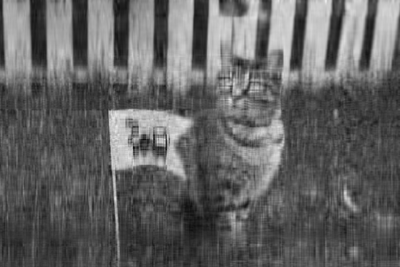

In [8]:
red=cat[:,:,0].copy()#take the red channel out
a,b=SVD(red,20)
as_image(approX(a,b))

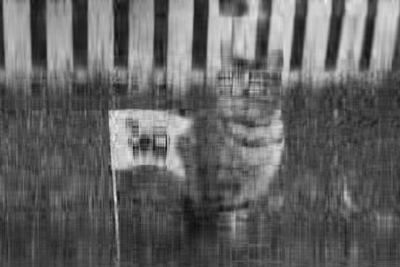

In [9]:
a,b=SVD(red,15)
as_image(approX(a,b))

I think the answer for the smallest number is different from person to person. I think 20 is the minimum number for me to make sure that it is the cat. 15 is recognizable but i cannot tell if it is a leopard baby.

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [10]:
print("How much bytes does the red color channel of the cat use? %s bytes" % red.nbytes)  
a,b=SVD(red,10)
n=a.nbytes+b.nbytes
print("How many bytes does the compressed version use when 10 terms are kept? %s bytes" % n ) 
percentage=round(100*n/red.nbytes) #i make a approximation here
print("What percentage of the original size is this? %s %%" % percentage ) 

How much bytes does the red color channel of the cat use? 106800 bytes
How many bytes does the compressed version use when 10 terms are kept? 53360 bytes
What percentage of the original size is this? 50 %


## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [14]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [15]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [16]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[ 11.+0.j  -1.+0.j]
 [ -1.+0.j   0.+0.j]] 
x approx is:
 [[ 1.33333333  1.83333333  1.83333333]
 [ 1.66666667  2.16666667  2.16666667]]


As you can see, for a matrix this small eliminating even one term gives a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out in the bottom right corner of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [11]:
def FFT(X,q):
    """Use the fast Fourier transform (FFT) to store the matrix X.
    
    Args:
        X(a n*p matrix): The original matrix.
        q: the number of terms kept.
        
    Returns:
        FFT coefficients and the dimensions of the matrix.
    """
    x_coef = np.fft.rfft2(X)
    x_coef[q:,q:] = 0
    shape=X.shape
    return x_coef,shape

In [12]:
def approFFT(x_coef,x_shape):
    """Takes FFT coefficients and dimensions and returns an approximation matrix for the original one
    
    Args:
        x_coef: The FFT coefficients
        x_shape: dimensions of the original matrix
        
    Returns:
        an approximation for the original matrix.
    """
    return np.fft.irfft2(x_coef,x_shape)

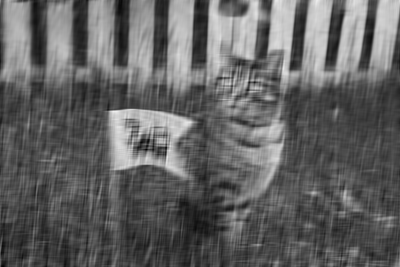

In [13]:
a,b=FFT(red,20)
as_image(approFFT(a,b))

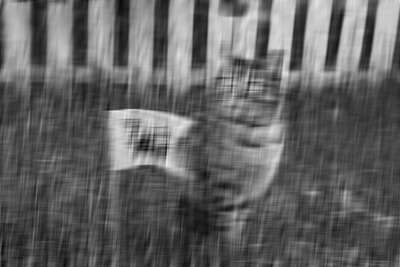

In [14]:
a,b=FFT(red,15)
as_image(approFFT(a,b))

I think the answer for the smallest number is different from person to person. I think 15 is the minimum number for me to make sure that it is the cat. 10 is recognizable but i cannot tell if it is a leopard baby.

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [15]:
a,b=SVD(red,15)
n1=a.nbytes+b.nbytes

c,d=FFT(red,15)
#take the non-zero element out and calculate the bytes.
c1=c[:15,:]
c2=c[15:,:15]
n2=c1.nbytes+c2.nbytes

print(n1,n2,red.nbytes)

80040 108720 106800


In [16]:
a,b=SVD(red,20)
n1=a.nbytes+b.nbytes

c,d=FFT(red,20)
#take the non-zero element out and calculate the bytes.
c1=c[:20,:]
c2=c[20:,:20]
n2=c1.nbytes+c2.nbytes

print(n1,n2,red.nbytes)

106720 143360 106800


In [17]:
print(c.dtype)
print(red.shape)
print(c.shape)

complex128
(267, 400)
(267, 201)


I compare this two decompositions when the photo output are almost the same. The photo is already shown in previous exercises.(Fix the clarity and see the difference.)

As the function used in this homework, I found that SVD is much better than the FFT. The bytes of FFT is even bigger than the original one and it is still not that clear, although SVD is only 80 bytes less than the original file. I think it is mainly because of the type. complex128 take much space to store.

To get rid of the type issue, let just calculate how many entries are there.

Take 20 as an example.

for SVD, we need to store nq+qp=q(n+p)=(267+400)\*20=13340

for FFT, the number is 267\*201-(267-20)\*(201-20)=8960

FFT is better.

This conclusion MAY be varied from case to case. As I can see in this homework, the clarity increase very fast as the q increases but FFT does not. It is some kind of trade-off between entries and clarity. If the clarity does matter, SVD will win as FFT is not that good.

As I mentioned before, the clarity is depends on people. It is not a solid way to judege by the clarity. I think the discussion below may be more valid.

**As for file compression, losing too much information as the photo does will destory the file and make it unreadable.**

In this situation, the reduction of FFT is $np-(D^2-r^2)$ where $D^2$ represent the entries number of FFT coefficients matrix and we set the lower right $r \times r$ square to 0. (This is the way how TA shows us, but in this homework i did it in another way, the lower right 0 matrix is not a square one, but the conclusion is still hold).

I did not know what $D^2$ is as i did not know what FFT exactly is. In this homework $D^2=267\times 201$ is less than the original matrix $267\times 400$. It means $np-(D^2-r^2)$ is positive.

As for SVD, we need to compare the storage of SVD which is $(p-r)\times (n+p)=np+p^2-nr-pr$  with $np$. The reduction is $nr+pr-p^2$. If r is too small it will even bigger than the original one. *i plug q=p-r in the equation.*



As for all the information i got in this homework, I think FFT will do a better job in file compression if the file type does not matters.

(Although I can change the type to test, but I still do not know the reason why it use complex128, testing may lead to preconception）